### Value at Risk (VaR) Analysis using the Historical Method

In [4]:
import os
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [5]:
from qf.risk import DATA_DIR

In [6]:
adj_close_file = os.path.join(DATA_DIR, 'adj_prices.csv')
adj_close_df = pd.read_csv(adj_close_file, parse_dates=['Date'], index_col='Date')


In [7]:
tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [13]:
# display(np.log(1+adj_close_df.pct_change(1)))
# display(np.log(adj_close_df/adj_close_df.shift(1)))

In [14]:
log_return_df = np.log(adj_close_df/adj_close_df.shift(1))
log_return_df = log_return_df.dropna()

In [15]:
log_return_df.isna().sum()

SPY    0
BND    0
GLD    0
QQQ    0
VTI    0
dtype: int64

In [16]:
display(log_return_df.head())

,SPY,BND,GLD,QQQ,VTI
Date,,,,,
2009-08-25,0.001941,0.001653,0.004538,0.002977,0.001921
2009-08-26,0.000097,0.000636,0.000323,-0.001735,-0.000768
2009-08-27,0.002227,-0.001144,0.004302,0.002478,0.003452
2009-08-28,-0.000194,0.002032,0.007270,0.000989,-0.000766
2009-08-31,-0.008939,0.001902,-0.005020,-0.010189,-0.009624


###  Equally Weighted Portfolio
Equally weighted portfolio with a total value of 1,000,000

In [17]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [20]:
display((log_return_df * weights).sum(axis=1))


Date
2009-08-25    0.002606
2009-08-26   -0.000289
2009-08-27    0.002263
2009-08-28    0.001866
2009-08-31   -0.006374
                ...   
2024-08-12    0.004158
2024-08-13    0.011912
2024-08-14    0.000002
2024-08-15    0.011615
2024-08-16    0.006041
Length: 3770, dtype: float64

In [18]:
hist_returns_df = (log_return_df * weights).sum(axis=1)
display(hist_returns_df)

Date
2009-08-25    0.002606
2009-08-26   -0.000289
2009-08-27    0.002263
2009-08-28    0.001866
2009-08-31   -0.006374
                ...   
2024-08-12    0.004158
2024-08-13    0.011912
2024-08-14    0.000002
2024-08-15    0.011615
2024-08-16    0.006041
Length: 3770, dtype: float64

### X-Day Historical Returns

X-day historical returns. In this example, we’ll use a 50-day window.

In [21]:
days = 50

range_returns_df = hist_returns_df.rolling(window = days).sum()
range_returns_df = range_returns_df.dropna()

display(range_returns_df)

Date
2009-11-03    0.044489
2009-11-04    0.044226
2009-11-05    0.056780
2009-11-06    0.057627
2009-11-09    0.070743
                ...   
2024-08-12    0.028571
2024-08-13    0.037958
2024-08-14    0.033774
2024-08-15    0.045695
2024-08-16    0.040038
Length: 3721, dtype: float64

### Calculating VaR Using the Historical Method

In [22]:
confidence_interval = 0.99

VaR = -np.percentile(range_returns_df, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

109875.15885043364


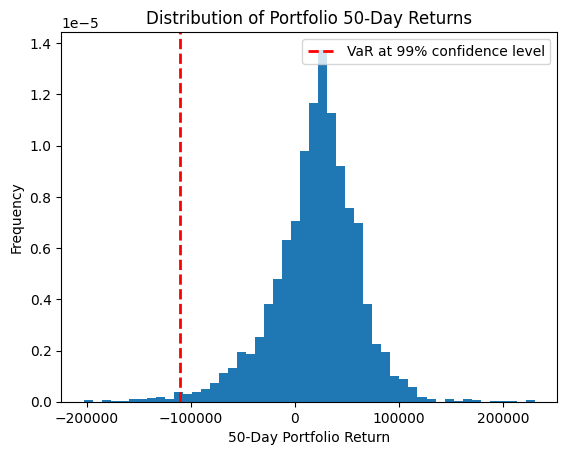

In [23]:
return_window = days
range_returns = hist_returns_df.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_portfolio = range_returns * portfolio_value

plt.hist(range_returns_portfolio.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns')
plt.axvline(-VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()